In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from google.colab import drive
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing, model_selection

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

seed = 21

In [3]:
drive.mount('/content/drive')
dir = tf.keras.utils.get_file('/content/drive/MyDrive/Data1/', origin = 'https://drive.google.com/drive/folders/1JRtJ_xlQJC8IFZynCSbKVDvsTM7tBorr?usp=sharing')
print(dir)

Mounted at /content/drive
/content/drive/MyDrive/Data1/


In [4]:
zip_dir = os.path.dirname(dir)
!find $zip_dir -type d -print

/content/drive/MyDrive/Data1
/content/drive/MyDrive/Data1/Train
/content/drive/MyDrive/Data1/Train/Homer
/content/drive/MyDrive/Data1/Train/Peter
/content/drive/MyDrive/Data1/Test
/content/drive/MyDrive/Data1/Test/Peter
/content/drive/MyDrive/Data1/Test/Homer


In [5]:
base_dir = os.path.dirname(dir)
train_dir = os.path.join(os.path.dirname(dir), 'Train')
test_dir = os.path.join(os.path.dirname(dir), 'Test')

train_homer = os.path.join(train_dir, 'Homer')
train_peter = os.path.join(train_dir, 'Peter')

test_homer = os.path.join(test_dir, 'Homer')
test_peter = os.path.join(test_dir, 'Peter')

In [6]:
BATCH_SIZE = 300  # Размер блока (кол-во изображений) которое будет обрабатывать модель за одну итерацию
IMG_SHAPE = 150  # Ращмерность к скоторой будет приведено входное изображение (150 на 150)

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

total_train = len(os.listdir(train_homer)) + len(os.listdir(train_peter))
total_test = len(os.listdir(test_homer)) + len(os.listdir(test_peter))

In [21]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                           directory = train_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_SHAPE, IMG_SHAPE),
                                                           class_mode = 'binary'
)
test_data_gen = test_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                           directory = test_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_SHAPE, IMG_SHAPE),
                                                           class_mode = 'binary'
)

Found 219 images belonging to 2 classes.
Found 163 images belonging to 2 classes.


In [22]:
sample_training_images, labels=next(train_data_gen)

In [23]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (100, 100))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

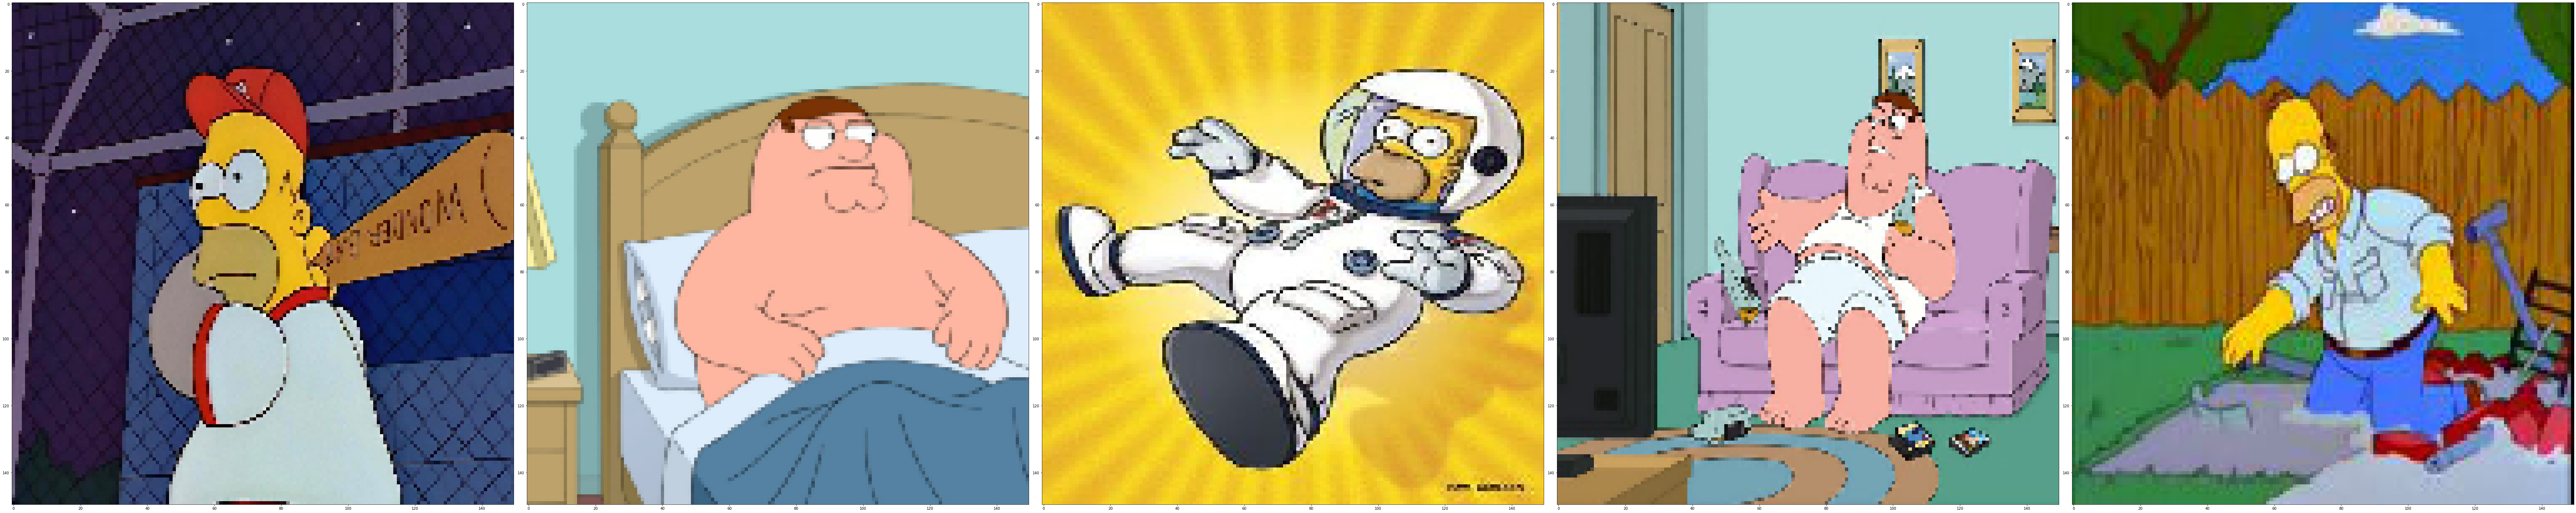

In [24]:
plotImages(sample_training_images)

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [26]:
model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 32)       

In [28]:
EPOCHS = 25
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = test_data_gen,
    validation_steps = int(np.ceil(total_test/float(BATCH_SIZE)))
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
1/1 [==============================] - 4s 4s/step - loss: 0.6940 - accuracy: 0.5890 - val_loss: 0.8423 - val_accuracy: 0.5337
Epoch 2/25
1/1 [==============================] - 2s 2s/step - loss: 0.7695 - accuracy: 0.5890 - val_loss: 0.6882 - val_accuracy: 0.5337
Epoch 3/25
1/1 [==============================] - 2s 2s/step - loss: 0.6609 - accuracy: 0.5890 - val_loss: 0.6667 - val_accuracy: 0.6626
Epoch 4/25
1/1 [==============================] - 2s 2s/step - loss: 0.6546 - accuracy: 0.7123 - val_loss: 0.6526 - val_accuracy: 0.5399
Epoch 5/25
1/1 [==============================] - 2s 2s/step - loss: 0.6322 - accuracy: 0.5890 - val_loss: 0.6297 - val_accuracy: 0.5399
Epoch 6/25
1/1 [==============================] - 2s 2s/step - loss: 0.6013 - accuracy: 0.5890 - val_loss: 0.5707 - val_accuracy: 0.6626
Epoch 7/25
1/1 [==============================] - 2s 2s/step - loss: 0.5478 - accuracy: 0.6941 - val_loss: 0.4915 - val_accuracy: 0.8589
Epoch 8/25
1/1 [=========================

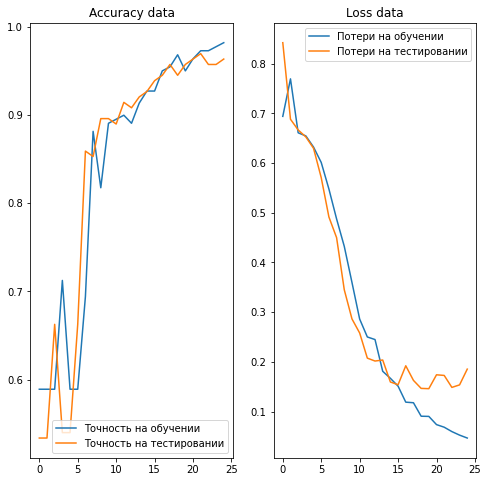

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на тестировании')
plt.legend(loc='lower right')
plt.title('Accuracy data')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Потери на обучении')
plt.plot(epochs_range,val_loss,label='Потери на тестировании')
plt.legend(loc='upper right')
plt.title('Loss data')
plt.savefig('./foo.png')
plt.show()

In [30]:
test_images, test_labels=next(test_data_gen)
predictions = model.predict(test_images)
test_labels = test_labels.astype(int)

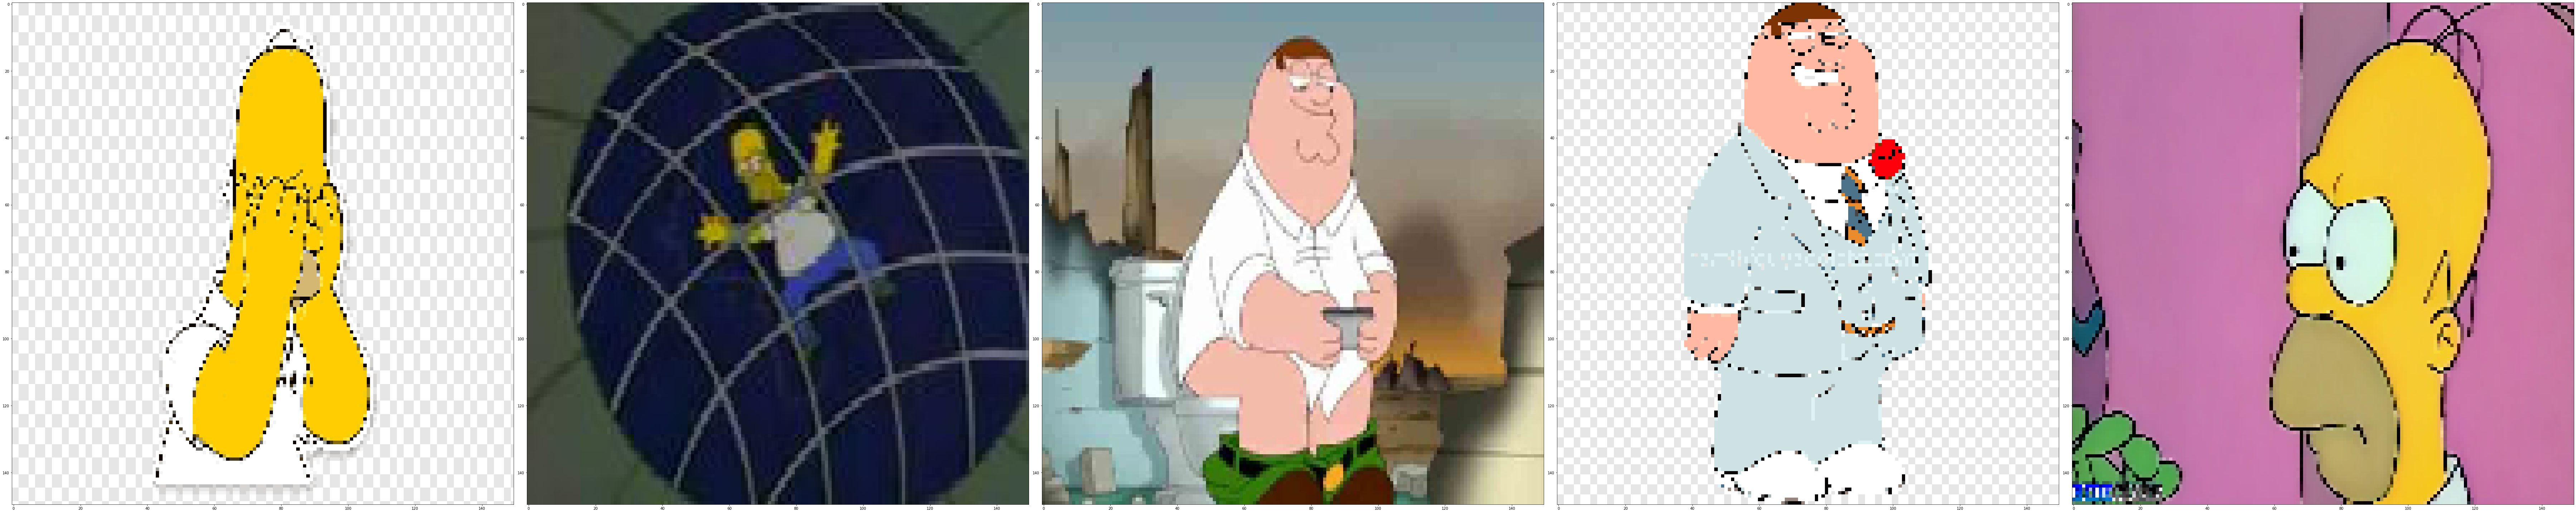

In [31]:
plotImages(test_images)

In [32]:
matrix = confusion_matrix(predictions.argmax(axis=-1), test_labels)

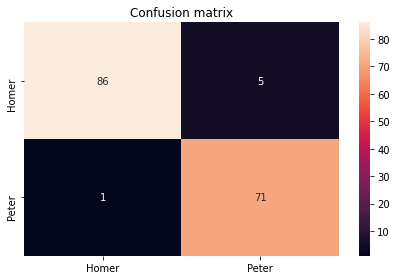

In [33]:
dataframe = pd.DataFrame(matrix, index=['Homer', 'Peter'], columns=['Homer', 'Peter'])
sns.heatmap(dataframe, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.tight_layout()
plt.show()